<a href="https://colab.research.google.com/github/IshitaAgrawal-N/Machine-Learning-Regression-Models/blob/main/SUBSTRATE_CONC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')


Mounted at /content/gdrive


# **NEURAL NETWORK MODEL**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

data = '/content/gdrive/My Drive/CHE SOP-DOP/1-s2.0-S1369703X18301359-mmc2.xlsx - Sheet1.csv'
df = pd.read_csv(data)

Parameters = ['Aeration Rate', 'AgitatorPower', 'Subst Feed Conc.', 'Substrate feed T', 'Temp', 'pH', 'Dis O2 Conc.', 'CO2 Conc.', 'VOL', 'Heat', 'Peni Conc.', 'Biomass Conc', 'Substrate Conc']
df.columns = Parameters
print(df.head())


   Aeration Rate  AgitatorPower  ...  Biomass Conc  Substrate Conc
0       7.997728      29.666590  ...      0.100000       15.000000
1       7.786650      30.725216  ...      0.105235       14.989514
2       7.667642      30.741825  ...      0.110740       14.978389
3       7.641116      30.311470  ...      0.116530       14.966589
4       8.304563      29.958562  ...      0.122621       14.954077

[5 rows x 13 columns]


In [ ]:
print(df.describe())

       Aeration Rate  AgitatorPower  ...  Biomass Conc  Substrate Conc
count   48000.000000   48000.000000  ...  48000.000000    48000.000000
mean        7.174676      33.084610  ...     10.997847        2.043106
std         1.087719       4.223971  ...      3.718742        6.038446
min         4.653990      23.979445  ...      0.000634       -0.010375
25%         6.262741      30.008750  ...     10.912407        0.012933
50%         7.289793      33.304819  ...     12.793935        0.022299
75%         8.044820      36.443006  ...     13.080617        0.057500
max         9.446993      40.697969  ...     13.489368       29.336738

[8 rows x 13 columns]


In [ ]:
X = df.drop(['Peni Conc.', 'Biomass Conc', 'Substrate Conc'], axis=1)
y = df['Substrate Conc']

In [ ]:
print(X)



       Aeration Rate  AgitatorPower  ...         VOL       Heat
0           7.997728      29.666590  ...  100.000000   0.008368
1           7.786650      30.725216  ...   99.987549   0.021791
2           7.667642      30.741825  ...   99.975100   0.071371
3           7.641116      30.311470  ...   99.962653   0.093127
4           8.304563      29.958562  ...   99.950208   0.142380
...              ...            ...  ...         ...        ...
47995       5.421724      36.327411  ...  105.720389  76.572162
47996       5.217079      35.776739  ...  105.729643  76.576014
47997       5.694386      35.206284  ...  105.738909  76.564558
47998       5.562624      36.284345  ...  105.748192  76.555443
47999       5.574685      35.997997  ...  105.757491  76.535246

[48000 rows x 10 columns]


In [ ]:
print(y)

0        15.000000
1        14.989514
2        14.978389
3        14.966589
4        14.954077
           ...    
47995     0.008121
47996     0.008268
47997     0.008417
47998     0.008580
47999     0.008751
Name: Substrate Conc, Length: 48000, dtype: float64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=20)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [ ]:
print(X_test_scaled)

[[-0.77346914  1.37783364  0.38123198 ...  0.46400136  1.58997535
   0.58232551]
 [-0.49204976  0.16752631  0.43282061 ... -0.30668483 -1.14626671
  -0.23690715]
 [-0.46701665 -1.82319065 -2.6629187  ... -2.90900815 -1.22421445
  -2.80568642]
 ...
 [-1.6163894  -1.02952337  0.38396933 ...  0.51943729  0.26547936
   0.65374575]
 [ 0.05831028  1.05774776  0.38102141 ... -0.08271203 -1.32254172
  -0.56494077]
 [ 0.79658618 -0.12047534  0.28458225 ...  0.59098659  1.67797132
   0.5435943 ]]


In [ ]:
model = Sequential()
model.add(Dense(128, input_dim=10, activation='relu'))

model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
model.summary()



Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 128)               1408      
_________________________________________________________________
dense_25 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 65        
Total params: 9,729
Trainable params: 9,729
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train_scaled, y_train, validation_split=0.2,epochs=100)


Epoch 1/100
960/960 [==============================] - 2s 2ms/step - loss: 8.6602 - mae: 1.0641 - val_loss: 4.7379 - val_mae: 0.7372
Epoch 2/100
960/960 [==============================] - 2s 2ms/step - loss: 4.3274 - mae: 0.6750 - val_loss: 4.3865 - val_mae: 0.6746
Epoch 3/100
960/960 [==============================] - 2s 2ms/step - loss: 4.1084 - mae: 0.6528 - val_loss: 4.3024 - val_mae: 0.6723
Epoch 4/100
960/960 [==============================] - 2s 2ms/step - loss: 3.8740 - mae: 0.6257 - val_loss: 4.4975 - val_mae: 0.6636
Epoch 5/100
960/960 [==============================] - 2s 2ms/step - loss: 3.8537 - mae: 0.6221 - val_loss: 4.5575 - val_mae: 0.6734
Epoch 6/100
960/960 [==============================] - 2s 2ms/step - loss: 3.7753 - mae: 0.6056 - val_loss: 4.0656 - val_mae: 0.6534
Epoch 7/100
960/960 [==============================] - 2s 2ms/step - loss: 3.7027 - mae: 0.6133 - val_loss: 3.9661 - val_mae: 0.6572
Epoch 8/100
960/960 [==============================] - 2s 2ms/step - 

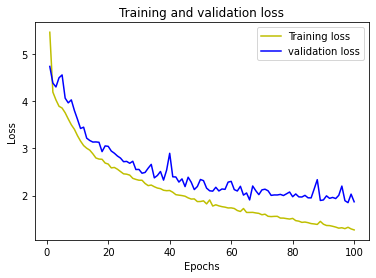

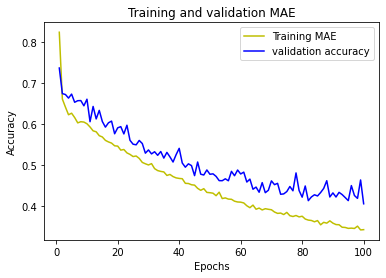

In [ ]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'y', label='Training loss')

plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['mae']
val_acc = history.history['val_mae']
plt.plot(epochs, acc, 'y', label='Training MAE')

plt.plot(epochs, val_acc, 'b', label='validation accuracy')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
predictions = model.predict(X_test_scaled[:10])
print("Predicted values are: ", predictions)
print("Real values are: ", y_test[:10])


Predicted values are:  [[ 3.9422482e-02]
 [ 1.3493538e-02]
 [ 1.4518671e+01]
 [ 2.4350142e+01]
 [ 1.5140474e-01]
 [-2.0145297e-02]
 [ 1.0924536e-01]
 [ 6.7731261e-02]
 [ 7.0429504e-02]
 [ 1.3506651e-02]]
Real values are:  31164     0.008973
15339     0.074512
32055    17.021274
30430    26.299353
17544     0.003808
6875      0.025146
36585     0.017500
38943     0.012832
40246     0.069556
8625      0.011843
Name: Substrate Conc, dtype: float64


In [ ]:
mse_neural, mae_neural = model.evaluate(X_test_scaled, y_test)
print('Mean squared error from neural network: ', mse_neural)
print('Mean absolute error from neural network: ', mae_neural)


300/300 [==============================] - 0s 1ms/step - loss: 1.6426 - mae: 0.3685
Mean squared error from neural network:  1.6425758600234985
Mean absolute error from neural network:  0.36851418018341064


In [ ]:
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

# **LINEAR REGRESSION MODEL**

In [ ]:
import pandas as pd
import numpy as np
data = '/content/gdrive/My Drive/CHE SOP-DOP/1-s2.0-S1369703X18301359-mmc2.xlsx - Sheet1.csv'
df = pd.read_csv(data)

Parameters = ['Aeration Rate', 'AgitatorPower', 'Subst Feed Conc.', 'Substrate feed T', 'Temp', 'pH', 'Dis O2 Conc.', 'CO2 Conc.', 'VOL', 'Heat', 'Peni Conc.', 'Biomass Conc', 'Substrate Conc']
df.columns = Parameters
print(df.head())



   Aeration Rate  AgitatorPower  ...  Biomass Conc  Substrate Conc
0       7.997728      29.666590  ...      0.100000       15.000000
1       7.786650      30.725216  ...      0.105235       14.989514
2       7.667642      30.741825  ...      0.110740       14.978389
3       7.641116      30.311470  ...      0.116530       14.966589
4       8.304563      29.958562  ...      0.122621       14.954077

[5 rows x 13 columns]


In [ ]:
X = df.drop(['Peni Conc.', 'Biomass Conc', 'Substrate Conc'], axis=1)
y = df['Substrate Conc']

In [ ]:
print(X)

       Aeration Rate  AgitatorPower  ...         VOL       Heat
0           7.997728      29.666590  ...  100.000000   0.008368
1           7.786650      30.725216  ...   99.987549   0.021791
2           7.667642      30.741825  ...   99.975100   0.071371
3           7.641116      30.311470  ...   99.962653   0.093127
4           8.304563      29.958562  ...   99.950208   0.142380
...              ...            ...  ...         ...        ...
47995       5.421724      36.327411  ...  105.720389  76.572162
47996       5.217079      35.776739  ...  105.729643  76.576014
47997       5.694386      35.206284  ...  105.738909  76.564558
47998       5.562624      36.284345  ...  105.748192  76.555443
47999       5.574685      35.997997  ...  105.757491  76.535246

[48000 rows x 10 columns]


In [ ]:
print(y)

0        15.000000
1        14.989514
2        14.978389
3        14.966589
4        14.954077
           ...    
47995     0.008121
47996     0.008268
47997     0.008417
47998     0.008580
47999     0.008751
Name: Substrate Conc, Length: 48000, dtype: float64


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=0)


In [ ]:
from sklearn.linear_model import LinearRegression
ml=LinearRegression()
ml.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred=ml.predict(X_test)
print(y_pred)


[-0.79265266 -0.16870892  0.04869533 ... 16.19284419 -2.43805486
 -0.23248734]


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)


0.8533438776313071

Text(0.5, 1.0, 'Substrate Concentration: Actual vs Predicted')

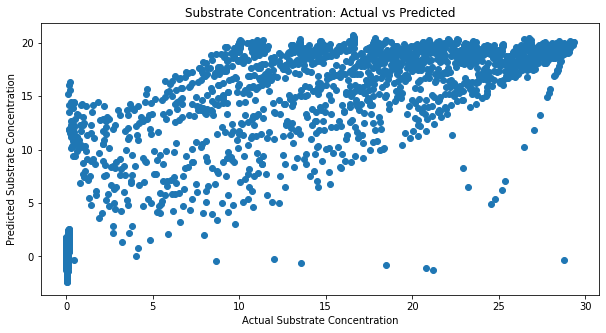

In [ ]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Substrate Concentration')
plt.ylabel('Predicted Substrate Concentration')
plt.title('Substrate Concentration: Actual vs Predicted')


In [ ]:
pred_y_df=pd.DataFrame({'Actual Value':y_test, 'Predicted Value':y_pred, 'Difference':y_test-y_pred})
pred_y_df[0:10]


,Actual Value,Predicted Value,Difference
37957,0.035805,-0.792653,0.828458
45965,0.018561,-0.168709,0.187270
33541,0.009614,0.048695,-0.039081
9905,0.050439,-0.364684,0.415124
9472,0.015205,-0.042551,0.057756
23682,0.019184,-0.009026,0.028209
12880,15.573440,12.080641,3.492799
786,0.007907,0.313150,-0.305243
3015,0.012001,-0.235783,0.247784
37111,0.030186,0.479845,-0.449659


In [ ]:
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
lr_model = linear_model.LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
print('Mean squared error from linear regression: ', mse_lr)
print('Mean absolute error from linear regression: ', mae_lr)


Mean squared error from linear regression:  5.432904002111622
Mean absolute error from linear regression:  1.0483118208945135


In [ ]:
from statsmodels.api import OLS
from statsmodels.api import add_constant
X_train = add_constant(X_train)
OLS(y_train, X_train).fit().summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Substrate Conc   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                 1.895e+04
Date:                Wed, 12 May 2021   Prob (F-statistic):               0.00
Time:                        17:38:35   Log-Likelihood:                -76168.
No. Observations:               33600   AIC:                         1.524e+05
Df Residuals:                   33589   BIC:                         1.525e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -107.1331     18.755     -5.712      0.000    -143.893     -70.374
Aeration Rate       -0.1851      0.012    -14.966      0.000      -0.209      -0.161
AgitatorPower       -0.0012      0.003     -0.373      0.709      -0.007       0.005
Subst Feed Conc.  -310.2666      2.465   -125.849      0.000    -315.099    -305.434
Substrate feed T     0.1183      0.044      2.690      0.007       0.032       0.205
Temp                 0.0421      0.045      0.941      0.347      -0.046       0.130
pH                  -3.5992      0.311    -11.584      0.000      -4.208      -2.990
Dis O2 Conc.        73.5173      1.025     71.742      0.000      71.509      75.526
CO2 Conc.           -1.0707      0.083    -12.928      0.000      -1.233      -0.908
VOL                  0.1445      0.009     16.563      0.000       0.127       0.162
Heat                -0.0054      0.003     -1.924      0.054      -0.011       0.000
==============================================================================
Omnibus:                     6731.720   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           236244.420
Skew:                           0.059   Prob(JB):                         0.00
Kurtosis:                      15.990   Cond. No.                     6.45e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.45e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# **RANDOM FOREST REGRESSION MODEL**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
data = '/content/gdrive/My Drive/CHE SOP-DOP/1-s2.0-S1369703X18301359-mmc2.xlsx - Sheet1.csv'
df = pd.read_csv(data)

Parameters = ['Aeration Rate', 'AgitatorPower', 'Subst Feed Conc.', 'Substrate feed T', 'Temp', 'pH', 'Dis O2 Conc.', 'CO2 Conc.', 'VOL', 'Heat', 'Peni Conc.', 'Biomass Conc', 'Substrate Conc']
df.columns = Parameters
print(df.head())


   Aeration Rate  AgitatorPower  ...  Biomass Conc  Substrate Conc
0       7.997728      29.666590  ...      0.100000       15.000000
1       7.786650      30.725216  ...      0.105235       14.989514
2       7.667642      30.741825  ...      0.110740       14.978389
3       7.641116      30.311470  ...      0.116530       14.966589
4       8.304563      29.958562  ...      0.122621       14.954077

[5 rows x 13 columns]


In [ ]:
X = df.drop(['Peni Conc.', 'Biomass Conc', 'Substrate Conc'], axis=1)
y = df['Substrate Conc']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=0)


In [ ]:
#Import the Random Forest Regressor 
from sklearn.ensemble import RandomForestRegressor   
  
#Create a Random Forest regressor object from Random Forest Regressor class
RFReg = RandomForestRegressor(n_estimators = 500, random_state = 0)
  
#Fit the random forest regressor with training data represented by X_train and y_train
RFReg.fit(X_train, y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
#Predicted Height from test dataset w.r.t Random Forest Regression
y_predict_rfr = RFReg.predict((X_test))

#Model Evaluation using R-Square for Random Forest Regression
from sklearn import metrics
r_square = metrics.r2_score(y_test, y_predict_rfr)
print('R-Square Error associated with Random Forest Regression is:', r_square)


R-Square Error associated with Random Forest Regression is: 0.9575146449754474


Text(0.5, 1.0, 'Substrate Concentration: Actual vs Predicted using Random Forest Regression')

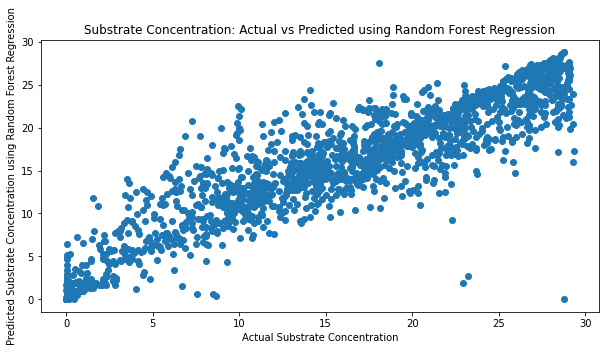

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, y_predict_rfr)
plt.xlabel('Actual Substrate Concentration')
plt.ylabel('Predicted Substrate Concentration')
plt.title('Substrate Concentration: Actual vs Predicted using Random Forest Regression')


In [ ]:
pred_y_df=pd.DataFrame({'Actual Value':y_test, 'Predicted Value':y_predict_rfr, 'Difference':y_test-y_predict_rfr})
pred_y_df[0:40]


,Actual Value,Predicted Value,Difference
37957,0.035805,0.035977,-0.000171
45965,0.018561,0.018431,0.000130
33541,0.009614,0.009396,0.000218
9905,0.050439,0.050528,-0.000089
9472,0.015205,0.015086,0.000119
23682,0.019184,0.019022,0.000162
12880,15.573440,12.177476,3.395963
786,0.007907,0.008528,-0.000621
3015,0.012001,0.011249,0.000752
37111,0.030186,0.030427,-0.000241


In [ ]:
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=500, random_state=0)
model.fit(X_train, y_train)
y_pred_rf = model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
print('Mean squared error for Random Forest Regression for Substrate Concentration: ', mse_rf)
print('Mean absolute error for Random Forest Regression for Substrate Concentration: ', mae_rf)


Mean squared error for Random Forest Regression for Substrate Concentration:  1.5738780736510585
Mean absolute error for Random Forest Regression for Substrate Concentration:  0.31011989907366266


In [ ]:
import pandas as pd
Parameters_list = list(X.columns)
Parameters_imp = pd.Series(model.feature_importances_,index=Parameters_list).sort_values()
print(Parameters_imp)

Subst Feed Conc.    0.000059
Temp                0.004416
Substrate feed T    0.004803
pH                  0.010106
VOL                 0.012252
CO2 Conc.           0.019778
Aeration Rate       0.027914
AgitatorPower       0.038728
Dis O2 Conc.        0.043268
Heat                0.838676
dtype: float64
